# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1736]:
# student details example: John S. 9812
#                       student details 1: Afik A. 7310
# (if exists)           student details 2: Adi H. 3389
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: chatgpt
Goal: understanding the task
Propmpt1: ם )60 נקודות + אפשרות של עד 10 נקודות בונוס(
• ניהול הניסויים עם validation cross( 20 נקודות( - בחירת פרמוטציה המיטבית -cross-fold5-
grid search בשיטת validation
o בחירת פרמוטציה של ה- engineering Feature, מודל הלמידה ו - parameter hyper
.grid search בשיט ; תסביר לי את ההגדרות שמופיעות פה

    
Propmpt2:תסביר על feature selection

    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [1742]:
import numpy as np
import scipy
import pandas as pd
from sklearn import datasets, model_selection, metrics 
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


from plotnine import ggplot, aes, geom_line, geom_point  
import pygal
from bokeh.plotting import figure, show  
import matplotlib.pyplot as plt
import seaborn as sns


import string
import re
import math
import statistics

In [1743]:
# load files
train_df = pd.read_csv('housing_train.csv')
test_df = pd.read_csv('housing_test.csv')

# presenting 5 first rows of each file
print("Train Set:")
print(train_df.head())

print("\nTest Set:")
print(test_df.head())

Train Set:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1  2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2  1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3  4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4  2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   

   Longitude  MedHouseVal  
0    -118.35        3.500  
1    -117.31        0.883  
2    -119.69        2.536  
3    -117.93        1.810  
4    -117.11        1.250  

Test Set:
   MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.3254      32.0   5.786260   1.033079       982.0  2.498728     34.29   
1  5.3032      52.0   5.095745   1.028369       980.0  3.475177     34.08   
2  4.1679      41.0   6.617486   1.371585       915.0  2.500000     37.05   
3  3.6429      28.0   5.249180   1.009836    

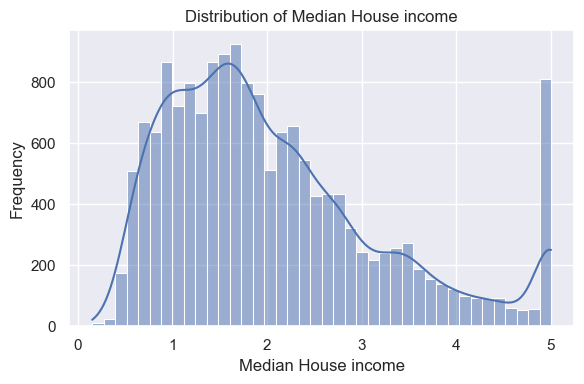

In [1744]:
# Plot 1: Distribution of the target variable (Median House Income) - histogram

sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.histplot(train_df['MedHouseVal'], bins=40, kde=True) 
plt.title('Distribution of Median House income')
plt.xlabel('Median House income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Purpose: Understand how the target variable (MedHouseIncome) is distributed.
#Insight: The distribution is left-skewed, indicating that most incomes are valued at mid-to-low range

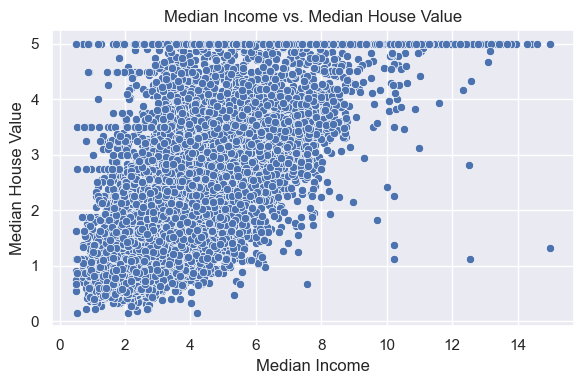

In [1745]:
# Plot 2: Scatter plot - Median Income vs. Median House Value

sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=train_df)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()

#Purpose: Visualize the relationship between household income and home value.
#Insight: There's a positive trend—higher income areas tend to have higher median house values. 


In [1746]:
# Table: Average house value by binned house age
train_df['HouseAgeBin'] = pd.cut(train_df['HouseAge'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10','11-20','21-30','31-40','41-50','51-60'])
avg_val_by_age = train_df.groupby('HouseAgeBin')['MedHouseVal'].mean().reset_index()
avg_val_by_age

#Purpose: Investigate how age of buildings affects house value.
#Insight:older buildings (51–60 years) have the highest average value.

C:\Users\afik3\AppData\Local\Temp\ipykernel_7644\2338780054.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,HouseAgeBin,MedHouseVal
0,0-10,2.009635
1,11-20,1.902579
2,21-30,2.060587
3,31-40,2.062222
4,41-50,2.078012
5,51-60,2.720314


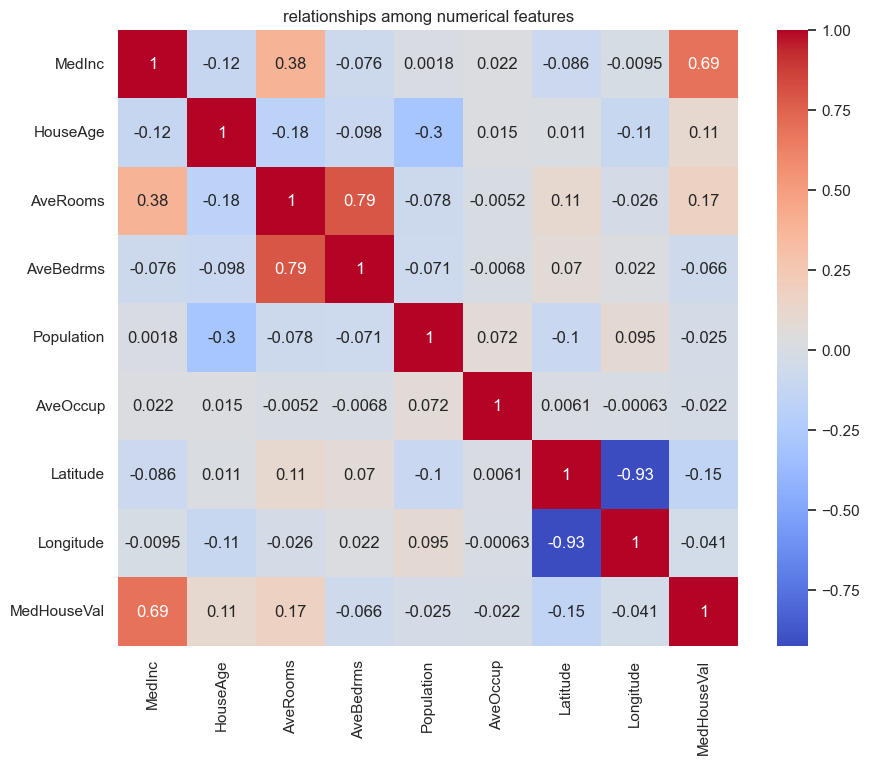

In [1747]:
# Plot 3: Heat-map - relationships among all numerical features  

sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('relationships among numerical features')
plt.show()


#Purpose: Reveal relationships among numerical features.
#Insight: MedInc (income) has a strong positive correlation with MedHouseVal.

## Part 3 - Experiments
You could add as many code cells as needed

In [1749]:
# We compared three versions of the MedInc feature — raw, log-transformed, and standardized 
# using a linear regression model with 5-fold cross-validation to evaluate which transformation yields the best performance.
# The results showed that the raw MedInc achieved the lowest mean squared error (MSE), indicating it provides the best fit for the model.

X1 = train_df[['MedInc']]
X2 = np.log1p(train_df[['MedInc']])
X3 = StandardScaler().fit_transform(train_df[['MedInc']])
y = train_df['MedHouseVal']

model = LinearRegression()
score1 = cross_val_score(model, X1, y, cv=5, scoring='neg_mean_squared_error').mean()
score2 = cross_val_score(model, X2, y, cv=5, scoring='neg_mean_squared_error').mean()
score3 = cross_val_score(model, X3, y, cv=5, scoring='neg_mean_squared_error').mean()

print("Raw MedInc:", -score1)
print("Log MedInc:", -score2)
print("Scaled MedInc:", -score3)
# the best model is score2 - raw MedInc

Raw MedInc: 0.7017340790219933
Log MedInc: 0.7342691314827373
Scaled MedInc: 0.7017340790219933


In [1750]:
# we compared three versions of HouseAge feature - raw, catagorical(one-hot) and average bin
# using a linear regression model with 5-fold cross-validation to which transformation yields the best performance.
# the results showed that the catagorical bins HouseAge achieved the lowest MSE, indicating it provides the best fit for the model 
# but we fear it will harm the fit section, so we are using average version

y = train_df['MedHouseVal']
X_raw = train_df[['HouseAge']]
model = LinearRegression()
score_raw = -cross_val_score(model, X_raw, y, cv=5, scoring='neg_mean_squared_error').mean()
bin_avg = train_df.groupby('HouseAgeBin')['HouseAge'].mean()
train_df['HouseAgeBin_avg'] = train_df['HouseAgeBin'].map(bin_avg)
X_avg = train_df[['HouseAgeBin_avg']]
score_avg = -cross_val_score(model, X_avg, y, cv=5, scoring='neg_mean_squared_error').mean()
X_cat = pd.get_dummies(train_df['HouseAgeBin'])
score_cat = -cross_val_score(model, X_cat, y, cv=5, scoring='neg_mean_squared_error').mean()
train_df = train_df.drop(columns=['HouseAgeBin'])
print(f"Raw HouseAge: {score_raw:.4f}")
print(f"Averaged Bin: {score_avg:.4f}")
print(f"Categorical Bin (one-hot): {score_cat:.4f}")
train_df.head()

Raw HouseAge: 1.3098
Averaged Bin: 1.3096
Categorical Bin (one-hot): 1.2929


C:\Users\afik3\AppData\Local\Temp\ipykernel_7644\609003345.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,HouseAgeBin_avg
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500,44.689202
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883,6.718799
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536,16.139646
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810,25.587500
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250,25.587500


In [1751]:
# creating a new feature which is more meaningful than the original features 
# If the ratio is high — it means there are many rooms but few bedrooms → this may indicate a house with large spaces (living room, kitchen, office, etc.).
# If the ratio is low — it likely indicates a small or crowded house, where most of the rooms are bedrooms.
train_df['Rooms_per_Bedroom'] = train_df['AveRooms'] / (train_df['AveBedrms'] + 1e-5)


# creating a new feature as well.
# If the ratio is high: it likely means there are many people living across a wide distribution of housing units — possibly a dense but well-planned area.
# If the ratio is low: it may indicate many people living in a single unit — meaning high housing density, which could suggest a less affluent area.
train_df['Pop_per_Occup'] = train_df['Population'] / (train_df['AveOccup'] + 1e-5)

# adding correlation between MedInc and HouseAge because in real life we can assume they have some correlation 
train_df['Income_Age_interaction'] = train_df['MedInc'] * train_df['HouseAge']

y = train_df['MedHouseVal']
X = train_df.drop(columns=['MedHouseVal'])
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print(f"Mean MSE after feature engineering: {mean_mse:.4f}")
train_df.head()

Mean MSE after feature engineering: 0.4806


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,HouseAgeBin_avg,Rooms_per_Bedroom,Pop_per_Occup,Income_Age_interaction
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500,44.689202,4.026790,396.996922,184.8234
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883,6.718799,3.516313,1788.992179,16.2012
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536,16.139646,3.356585,531.997864,21.6954
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810,25.587500,5.446010,1108.997315,113.4866
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250,25.587500,4.224774,711.997596,47.7855


In [1752]:
y = train_df['MedHouseVal'] 
X = train_df.drop(columns=['MedHouseVal'])

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print(f"Mean MSE after feature engineering: {mean_mse:.4f}")
# after all the experiments we ended up with mean MSE of 0.4806 which is pretty good

Mean MSE after feature engineering: 0.4806


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [1754]:
# 
test_df['Rooms_per_Bedroom'] = test_df['AveRooms'] / (test_df['AveBedrms'] + 1e-5)
test_df['Pop_per_Occup'] = test_df['Population'] / (test_df['AveOccup'] + 1e-5)

test_df['Income_Age_interaction'] = test_df['MedInc'] * test_df['HouseAge']

# Align features with training set
X_train = train_df.drop(columns=['MedHouseVal'])
X_test = test_df.reindex(columns=X_train.columns, fill_value=0)


y_train = train_df['MedHouseVal']
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Part 5 - Apply on test and show model performance estimation

In [1756]:
# Extract true values from test set
y_test = test_df['MedHouseVal']

# Predict with the trained model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R2 Score: {r2:.4f}")

Test MSE: 0.4723
Test RMSE: 0.6872
Test R2 Score: 0.6519


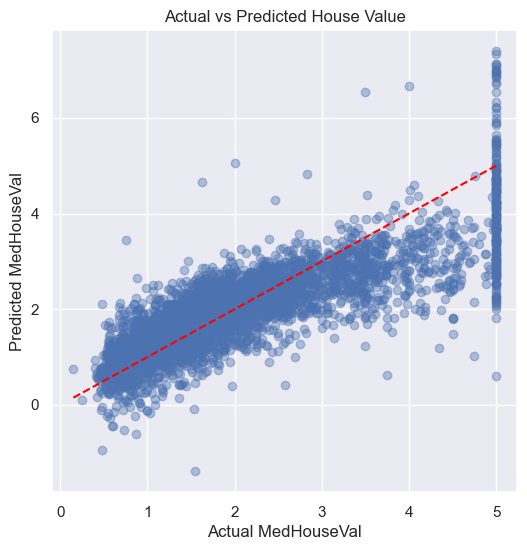

In [1757]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted House Value')
plt.grid(True)
plt.show()